## Students Performance in Exams
여러 상황에서 학생들의 시험 점수를 나타낸 [kaggle 데이터](https://www.kaggle.com/spscientist/students-performance-in-exams)를 사용하여 EDA를 진행해보겠다.  

### library import 및 데이터 확인

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
data = pd.read_csv('StudentsPerformance.csv')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 결측치 확인

In [2]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### object cols의 unique값 확인

In [3]:
for col in data.columns:
    if data[col].dtype == 'object':
        print(col, data[col].unique())

gender ['female' 'male']
race/ethnicity ['group B' 'group C' 'group A' 'group D' 'group E']
parental level of education ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
lunch ['standard' 'free/reduced']
test preparation course ['none' 'completed']


### group A~E의 대략적인 의미 파악  
group과 lunch와의 관계

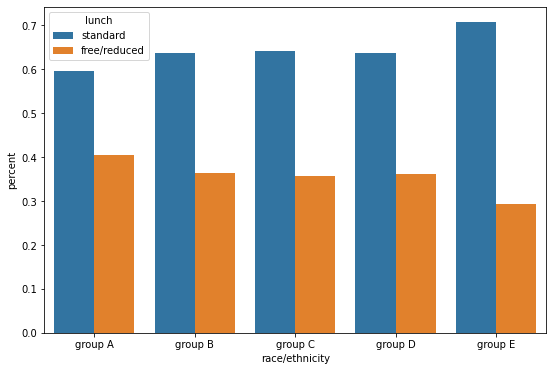

In [4]:
data_r = data.groupby('race/ethnicity')['lunch'].value_counts(normalize=True)
data_r = data_r.rename('percent').reset_index()
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
sns.barplot(x='race/ethnicity', y='percent', hue='lunch', data=data_r)
plt.show()

기본적으로 미국에서 standard lunch를 이용하는 학생은, free/reduced lunch를 이용하는 학생에 비해 좀 더 잘사는 집이라 말할 수 있다.  
group B~D의 재력은 비슷해보이지만, group A는 재력이 전체적으로 낮고, group E는 전체적으로 잘사는 group으로 확인된다.

group과 부모의 학력 관계

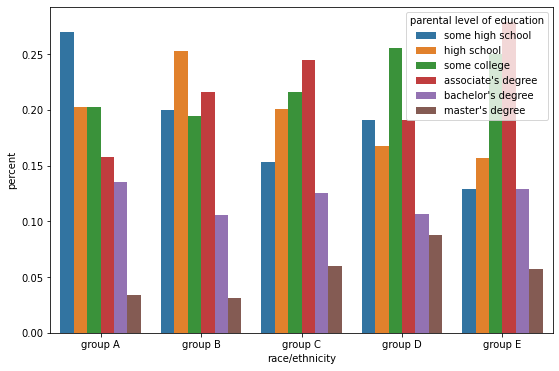

In [5]:
data_r = data.groupby('race/ethnicity')['parental level of education'].value_counts(normalize=True)
data_r = data_r.rename('percent').reset_index()
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
sns.barplot(x='race/ethnicity', y='percent', hue='parental level of education', data=data_r)
plt.show()

대체적으로 group A 방향(왼쪽 방향)일수록 고등학교 중퇴/고졸 비율이 높으며 group E 방향(오른쪽 방향)일수록 대학 졸업 비율이 높다.  
정리하면, group A에서 E로 갈수록 집안의 재력도 높아지고, 부모의 학력도 높아짐을 확인할 수 있다.  
그렇다면, group A에서 E로 갈수록 해당 학생들의 시험 점수도 높아지지 않을까?

### 비교 column 생성
점수는 3가지(수학, 읽기, 쓰기)의 cols로 있지만, 합쳐서 하나의 점수로 보고자 한다. (for simplicity)

In [6]:
data['scores'] = data['math score'] + data['reading score'] + data['writing score']

### 점수와 관계있는 features
group과 점수와의 관계

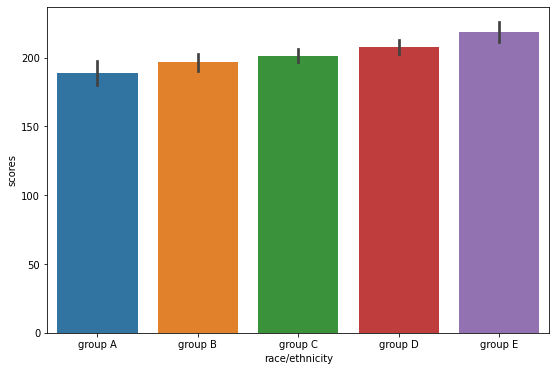

In [7]:
group_order = ['group A', 'group B', 'group C', 'group D', 'group E']
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
sns.barplot(x='race/ethnicity', y='scores', data=data, order=group_order, ax=ax)
plt.show()

예상한대로, group A에서 E로 갈수록 학생들의 점수가 더 좋아짐을 확인할 수 있다.  
부모의 학력, 시험 준비와 점수와의 관계도 확인해보자.

부모의 학력과 점수와의 관계

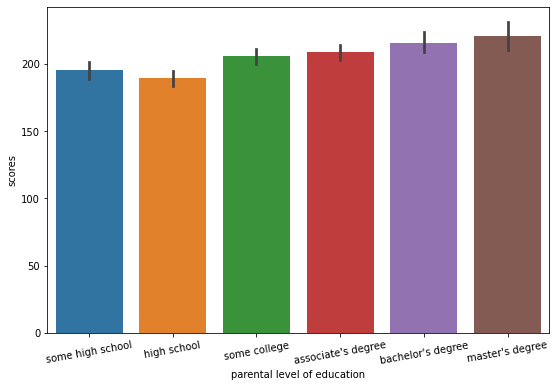

In [8]:
level_order = ['some high school', 'high school', 'some college', 'associate\'s degree', 'bachelor\'s degree', 'master\'s degree']
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
sns.barplot(x='parental level of education', y='scores', data=data, order=level_order, ax=ax)
ax.set_xticklabels(labels=level_order, rotation=10)
plt.show()

시험 준비 여부와 점수와의 관계

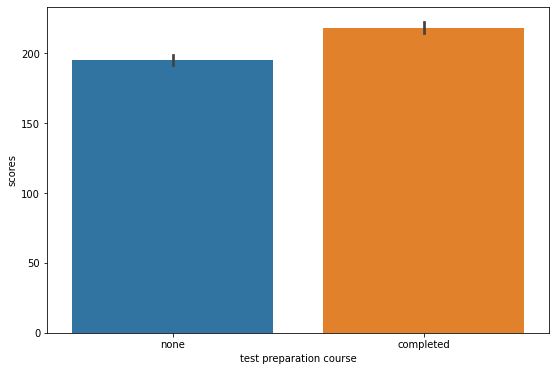

In [9]:
prep_order = ['none', 'completed']
fig, ax = plt.subplots(1, 1, figsize=[9, 6])
sns.barplot(x='test preparation course', y='scores', data=data, order=prep_order, ax=ax)
plt.show()

정리하면,  

1. group이 A에서 E로 갈수록  
2. 부모의 학력이 높을수록  
3. 비싼 점심(standard)을 먹을수록  
4. 시험 준비를 할수록  

학생들의 시험 점수가 높아짐을 확인할 수 있다.

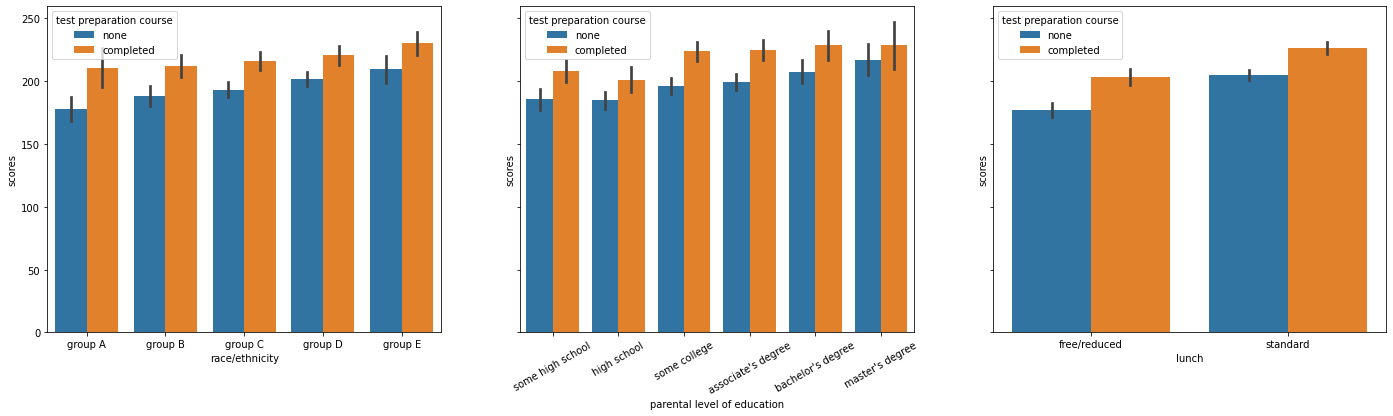

In [10]:
fig, ax = plt.subplots(1, 3, figsize=[24, 6], sharey=True)
sns.barplot(x='race/ethnicity', y='scores', hue='test preparation course', data=data, order=group_order, ax=ax[0])
sns.barplot(x='parental level of education', y='scores', hue='test preparation course', data=data, order=level_order, ax=ax[1])
sns.barplot(x='lunch', y='scores', hue='test preparation course', data=data, order=['free/reduced', 'standard'], ax=ax[2])
ax[1].set_xticklabels(labels=level_order, rotation=30)
plt.show()